In [1]:
#|default_exp app

## Gradio Pets

In [2]:
#|export
import timm
from fastai.vision.all import *
import gradio as gr


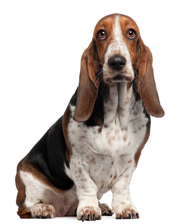

In [7]:
im = PILImage.create('basset.jpg')
im.thumbnail((224,224))
im

In [8]:
#export
learn = load_learner('model.pkl')

In [9]:
learn.predict(im)

('basset_hound',
 tensor(14),
 tensor([1.2428e-08, 9.0320e-08, 1.2463e-08, 6.4438e-08, 4.2666e-09, 2.5847e-07,
         8.1357e-07, 7.0785e-08, 1.7820e-08, 2.9266e-07, 5.6267e-08, 2.8599e-08,
         1.0324e-08, 6.0766e-09, 9.9999e-01, 2.1947e-06, 4.2777e-10, 3.0863e-08,
         3.7551e-08, 6.3470e-09, 7.5487e-08, 6.4546e-09, 2.5085e-07, 6.5254e-09,
         8.4884e-08, 1.2628e-07, 2.8313e-08, 6.0686e-08, 6.0019e-08, 9.3829e-08,
         7.2135e-08, 1.6930e-08, 3.0295e-08, 1.5517e-08, 4.0913e-08, 1.4516e-07,
         1.3174e-07]))

In [10]:
#export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [11]:
classify_image(im)

{'Abyssinian': 1.2427935125458589e-08,
 'Bengal': 9.031979431028958e-08,
 'Birman': 1.246332814730522e-08,
 'Bombay': 6.443830358193736e-08,
 'British_Shorthair': 4.2665577737466265e-09,
 'Egyptian_Mau': 2.5847273832368955e-07,
 'Maine_Coon': 8.135660891639418e-07,
 'Persian': 7.078486419231922e-08,
 'Ragdoll': 1.782006364692279e-08,
 'Russian_Blue': 2.926609852238471e-07,
 'Siamese': 5.626715804396554e-08,
 'Sphynx': 2.8599124846095947e-08,
 'american_bulldog': 1.0324109567250161e-08,
 'american_pit_bull_terrier': 6.076632530493953e-09,
 'basset_hound': 0.9999947547912598,
 'beagle': 2.194723037973745e-06,
 'boxer': 4.277669607422041e-10,
 'chihuahua': 3.086251254558192e-08,
 'english_cocker_spaniel': 3.7551060927398794e-08,
 'english_setter': 6.346998926431979e-09,
 'german_shorthaired': 7.548660363454474e-08,
 'great_pyrenees': 6.454578205250527e-09,
 'havanese': 2.508541285806132e-07,
 'japanese_chin': 6.525408213775563e-09,
 'keeshond': 8.488385105920315e-08,
 'leonberger': 1.2627

In [14]:
#export
image = gr.Image()
label = gr.Label()
examples = ['basset.jpg']

In [ ]:
#export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:3000/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7f591050c970>,
 'http://127.0.0.1:3000/',
 None)

In [15]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((64,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=64)
              (norm): LayerNorm2d((64,), eps=1e-06, elementwise_affine=True)
              (mlp): GlobalResponseNormMlp(
                (fc1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (grn): GlobalResponseNorm()
                (fc2): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_p

In [16]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([-1.7017e-01,  7.8714e-01,  1.6692e-01,  2.3642e-01,  1.7279e-01,
          5.6471e-01,  5.2322e-01,  2.4438e-01,  3.5911e-03,  8.1159e-02,
          2.2214e-01,  2.2781e-01,  6.1698e-01,  3.6992e-01,  5.5869e-04,
          1.3747e-01, -1.0951e-04,  1.6932e-01,  2.5044e-01,  9.6852e-02,
          4.3527e-01,  7.0614e-02,  1.6543e-01,  4.0221e-01,  5.0651e-01,
          2.3070e-01,  4.3776e-01,  6.3667e-01,  1.2743e-01,  2.4919e-01,
          6.3471e-01,  5.8814e-01, -7.1979e-03,  3.3971e-01,  6.3791e-01,
          6.6969e-01,  5.2598e-01,  4.9911e-01,  4.9432e-01,  3.2041e-01,
          5.3273e-01,  1.0054e+00,  4.7121e-01, -7.9435e-03,  5.2056e-01,
          7.0624e-01, -7.3902e-03,  1.9926e-01,  3.1857e-01,  4.3545e-01,
          6.8108e-01, -2.7685e-03,  5.4398e-01,  2.7491e-01,  6.4499e-01,
          1.7117e-01,  6.6977e-03, -1.2051e-03,  6.2254e-01,  2.3251e-01,
          5.8473e-01,  5.0845e-01, -3.5957e-03,  3.0317e-01],
        requires_grad=True)

In [17]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())

[Parameter containing:
 tensor([[[[ 0.0001]],
 
          [[-0.0500]],
 
          [[ 0.0025]],
 
          ...,
 
          [[ 0.0172]],
 
          [[ 0.0091]],
 
          [[-0.0047]]],
 
 
         [[[ 0.0097]],
 
          [[ 0.0010]],
 
          [[ 0.0017]],
 
          ...,
 
          [[ 0.0184]],
 
          [[-0.0076]],
 
          [[-0.0230]]],
 
 
         [[[ 0.0075]],
 
          [[-0.0045]],
 
          [[ 0.0064]],
 
          ...,
 
          [[-0.0127]],
 
          [[-0.0054]],
 
          [[-0.0069]]],
 
 
         ...,
 
 
         [[[ 0.0052]],
 
          [[-0.0046]],
 
          [[ 0.0076]],
 
          ...,
 
          [[ 0.0141]],
 
          [[-0.0196]],
 
          [[-0.0249]]],
 
 
         [[[ 0.0108]],
 
          [[-0.0055]],
 
          [[-0.0027]],
 
          ...,
 
          [[-0.0017]],
 
          [[ 0.0020]],
 
          [[ 0.0038]]],
 
 
         [[[-0.0173]],
 
          [[-0.0226]],
 
          [[-0.0245]],
 
          ...,
 
          [[-0.01